In [2]:
import pymysql
import matplotlib.pyplot as plt
import numpy as np
from LocalDatabase import get_schedule_connection

In [3]:
connect = get_schedule_connection()
cur = connect.cursor()

In [4]:
sql = " select case date_format(s.begin_at ,'%w') when 0 then 7 else date_format(s.begin_at ,'%w') end , \
case date_format(begin_at, '%H:%i') \
when '08:40' then 1 when '09:20' then 2 when '10:00' then 3 when '10:40' then 4 when '11:20' then 5 \
when '18:40' then 6 when '19:20' then 7 when '20:00' then 8 when '20:40' then 8 else 0 \
end slot, \
count(*) \
from student_appointments  sa inner join  (select id, begin_at from schedules where date_format(begin_at, '%Y-%u')  = '2018-04' and date_format(begin_at, '%H:%i') in ('08:40', '09:20', \
'10:00', '10:40', '11:20', '18:40', '19:20', '20:00', '20:40') and is_internal = 0)  s on sa.schedule_id = s.id \
where sa.status in (3,4,5) and sa.deleted_at is null \
group by s.begin_at; "
cur.execute(sql)
data = cur.fetchall()
ndata_4 = np.array(data).astype(np.int32)

sql = " select case date_format(s.begin_at ,'%w') when 0 then 7 else date_format(s.begin_at ,'%w') end , \
case date_format(begin_at, '%H:%i') \
when '08:40' then 1 when '09:20' then 2 when '10:00' then 3 when '10:40' then 4 when '11:20' then 5 \
when '18:40' then 6 when '19:20' then 7 when '20:00' then 8 when '20:40' then 8 else 0 \
end slot, \
count(*) \
from student_appointments  sa inner join  (select id, begin_at from schedules where date_format(begin_at, '%Y-%u')  = '2018-05' and date_format(begin_at, '%H:%i') in ('08:40', '09:20', \
'10:00', '10:40', '11:20', '18:40', '19:20', '20:00', '20:40') and is_internal = 0)  s on sa.schedule_id = s.id \
where sa.status in (3,4,5) and sa.deleted_at is null \
group by s.begin_at; "
cur.execute(sql)
data = cur.fetchall()
ndata_5 = np.array(data).astype(np.int32)

sql = """
select case date_format(s.begin_at ,'%w') when 0 then 7 else date_format(s.begin_at ,'%w') end , 
case date_format(begin_at, '%H:%i')
when '08:40' then 1 when '09:20' then 2 when '10:00' then 3 when '10:40' then 4 when '11:20' then 5 
when '18:40' then 6 when '19:20' then 7 when '20:00' then 8 when '20:40' then 8 else 0
end slot,
count(*)
from student_appointments  sa inner join  (select id, begin_at from schedules where date_format(begin_at, '%Y-%u')  = '2018-06' and date_format(begin_at, '%H:%i') in ('08:40', '09:20',
'10:00', '10:40', '11:20', '18:40', '19:20', '20:00', '20:40') and is_internal = 0)  s on sa.schedule_id = s.id
where sa.status in (3,4,5) and sa.deleted_at is null
group by s.begin_at;
""" 
cur.execute(sql)
data = cur.fetchall()
ndata_6 = np.array(data).astype(np.int32)

In [11]:
ndata_6

array([[   1,    1,  595],
       [   1,    2,  871],
       [   1,    3, 1019],
       [   1,    4,  848],
       [   1,    5,  609],
       [   1,    6, 3026],
       [   1,    7, 4512],
       [   1,    8, 5003],
       [   1,    8, 4303],
       [   2,    1,  890],
       [   2,    2, 1247],
       [   2,    3, 1415],
       [   2,    4, 1254],
       [   2,    5,  817],
       [   2,    6, 3000],
       [   2,    7, 4492],
       [   2,    8, 4819],
       [   2,    8, 3847],
       [   3,    1,  806],
       [   3,    2, 1174],
       [   3,    3, 1620],
       [   3,    4, 1244],
       [   3,    5,  851],
       [   3,    6, 2775],
       [   3,    7, 4089],
       [   3,    8, 4590],
       [   3,    8, 3547],
       [   4,    1,  731],
       [   4,    2, 1225],
       [   4,    3, 1414],
       [   4,    4, 1123],
       [   4,    5,  846],
       [   4,    6, 2768],
       [   4,    7, 4007],
       [   4,    8, 4338],
       [   4,    8, 3451],
       [   5,    1,  902],
 

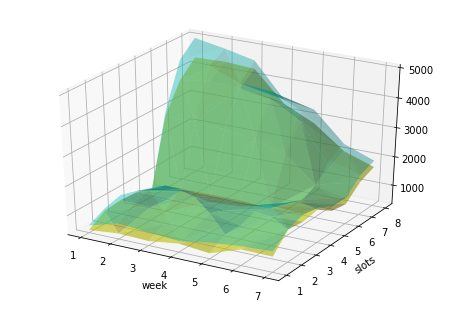

In [5]:
from mpl_toolkits.mplot3d import Axes3D,axes3d
fig = plt.figure(1)
ax = Axes3D(fig)
#ax.scatter(ndata[:, 0],ndata[:, 1],ndata[:, 2])
#ax.plot_trisurf(ndata_4[:, 0],ndata_4[:, 1],ndata_4[:, 2], alpha=0.4, color='r')
ax.plot_trisurf(ndata_5[:, 0],ndata_5[:, 1],ndata_5[:, 2], alpha=0.6, color='y')
ax.plot_trisurf(ndata_6[:, 0],ndata_6[:, 1],ndata_6[:, 2], alpha=0.4, color='c')
ax.set_xlabel('week')
ax.set_ylabel('slots')
plt.show()

In [6]:
X, Y, Z = axes3d.get_test_data(0.05)

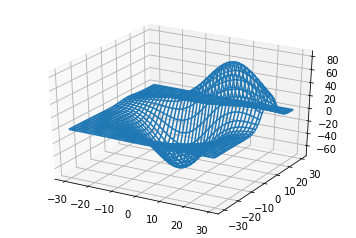

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z)

plt.show()

In [12]:
X

array([[-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       ..., 
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5]])

In [9]:
Y

array([[-30. , -30. , -30. , ..., -30. , -30. , -30. ],
       [-29.5, -29.5, -29.5, ..., -29.5, -29.5, -29.5],
       [-29. , -29. , -29. , ..., -29. , -29. , -29. ],
       ..., 
       [ 28.5,  28.5,  28.5, ...,  28.5,  28.5,  28.5],
       [ 29. ,  29. ,  29. , ...,  29. ,  29. ,  29. ],
       [ 29.5,  29.5,  29.5, ...,  29.5,  29.5,  29.5]])

In [10]:
Z

array([[-0.00982064, -0.0113957 , -0.01319036, ..., -0.01522953,
        -0.01319036, -0.0113957 ],
       [-0.0113957 , -0.01322338, -0.01530587, ..., -0.01767209,
        -0.01530587, -0.01322338],
       [-0.01319036, -0.01530587, -0.01771632, ..., -0.02045518,
        -0.01771632, -0.01530587],
       ..., 
       [-0.01200234, -0.01414685, -0.01660867, ...,  0.02918791,
         0.03019517,  0.03085725],
       [-0.01097235, -0.01288301, -0.01507265, ...,  0.01583738,
         0.01709512,  0.01804782],
       [-0.00988645, -0.01157475, -0.01350698, ...,  0.00702321,
         0.0083816 ,  0.00947216]])